In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [2]:
# Data Read n Exploration
data = pd.read_csv("/Users/randomfuck/Desktop/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data = data.drop(['Time'] , axis=1)

In [4]:
# Data Pre-processing
outliers = data.loc[data['Class']==1]
normal = data.loc[data['Class']==0]

In [5]:
outliers = outliers.drop(['Class'] , axis=1)
normal = normal.drop(['Class'] , axis=1)

In [6]:
normal_=np.array(normal)
outliers_=np.array(outliers)

In [7]:
X_train = np.array(normal.iloc[0:142403,:])
X_test = np.array(normal.iloc[142403:,:])
X_outliers = np.array(outliers)

In [8]:
X_lof=np.r_[normal_+2,normal_-2,outliers_]

In [9]:
X_lof

array([[ 6.40192866e-01,  1.92721883e+00,  4.53634674e+00, ...,
         2.13355838e+00,  1.97894695e+00,  1.51620000e+02],
       [ 3.19185711e+00,  2.26615071e+00,  2.16648011e+00, ...,
         1.99101690e+00,  2.01472417e+00,  4.69000000e+00],
       [ 6.41645938e-01,  6.59836925e-01,  3.77320934e+00, ...,
         1.94464721e+00,  1.94024816e+00,  3.80660000e+02],
       ...,
       [-6.76142671e-01,  1.12636606e+00, -2.21369952e+00, ...,
         3.85107449e-01,  1.94361479e-01,  7.78900000e+01],
       [-3.11383161e+00,  5.85864172e-01, -5.39973021e+00, ...,
         8.84875540e-01, -2.53700319e-01,  2.45000000e+02],
       [ 1.99197610e+00,  1.58475887e-01, -2.58344065e+00, ...,
         2.98758224e-03, -1.53088128e-02,  4.25300000e+01]])

In [10]:
# Data Visualization
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(X_train)
x_test_pca=pca.fit_transform(X_test)
x_outliers_pca=pca.fit_transform(X_outliers)

In [11]:
x_train_pca=pd.DataFrame(x_train_pca)
x_test_pca=pd.DataFrame(x_test_pca)
x_outliers_pca=pd.DataFrame(x_outliers_pca)

In [ ]:
plt.scatter(x_train_pca[0],x_train_pca[1],label="Normal Train")
plt.scatter(x_outliers_pca[0],x_outliers_pca[1],label='Outlier')
plt.scatter(x_test_pca[0],x_test_pca[1],label="Normal Test")
plt.legend()
#plt.show()
# !!!Crashed for some reason ~ check again!!!

In [ ]:
# Isolation Forest

In [12]:
clf = IsolationForest(max_samples=100)
clf.fit(X_train)

/Users/randomfuck/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/randomfuck/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [13]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

/Users/randomfuck/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Users/randomfuck/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Users/randomfuck/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


/Users/randomfuck/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/randomfuck/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


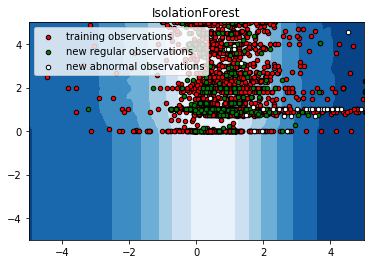

In [14]:
# plot the line, the samples, and the nearest vectors to the plane
x_train=X_train[:10000,[1,28]]
x_test=X_test[:1000,[1,28]]
x_outliers=X_outliers[:100,[1,28]]

x_train=np.array(x_train)
x_test=np.array(x_test)
x_outliers=np.array(x_outliers)

clf_test = IsolationForest(max_samples=100)
clf_test.fit(x_train)

xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf_test.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(x_train[:, 0], x_train[:, 1], c='red',
                 s=20, edgecolor='k')
b2 = plt.scatter(x_test[:, 0], x_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(x_outliers[:, 0], x_outliers[:, 1], c='white',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

In [16]:
print("Accuracy test :", list(y_pred_test).count(1)/y_pred_test.shape[0])
print("Accuracy outliners:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

Accuracy test : 0.8518307119905293
Accuracy outliners: 0.9126016260162602


In [17]:
# OneClassSVM

In [18]:
clf2=svm.OneClassSVM(kernel='linear', gamma=0.001, nu=0.95)
clf2.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='linear',
            max_iter=-1, nu=0.95, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

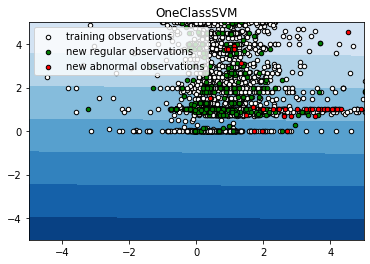

In [19]:
# plot the line, the samples, and the nearest vectors to the plane
x_train=X_train[:10000,[1,28]]
x_test=X_test[:1000,[1,28]]
x_outliers=X_outliers[:100,[1,28]]

x_train=np.array(x_train)
x_test=np.array(x_test)
x_outliers=np.array(x_outliers)

clf_test_2 = svm.OneClassSVM(kernel='linear', gamma=0.001, nu=0.95)
clf_test_2.fit(x_train)

xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf_test_2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("OneClassSVM")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(x_train[:, 0], x_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(x_test[:, 0], x_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(x_outliers[:, 0], x_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

In [22]:
y_pred_train_2 = clf2.predict(X_train)
y_pred_test_2 = clf2.predict(X_test)
y_pred_outliners_2 = clf2.predict(X_outliers)

In [23]:
print("Accuracy test :", list(y_pred_test_2).count(1)/y_pred_test_2.shape[0])
print("Accuracy outliners:", list(y_pred_outliners_2).count(-1)/y_pred_outliners_2.shape[0])

Accuracy test : 0.04693753875641243
Accuracy outliners: 0.9126016260162602


In [24]:
# Local Outlier Factor

In [25]:
clf3 = LocalOutlierFactor(n_neighbors=20)
clf3

LocalOutlierFactor(algorithm='auto', contamination='legacy', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

In [26]:
y_pred = clf3.fit_predict(X_lof)
y_pred_outliers = y_pred[200:]

/Users/randomfuck/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [27]:
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X_lof), dtype=int)
ground_truth[-n_outliers:] = -1
n_errors = (y_pred != ground_truth).sum()
X_scores = clf3.negative_outlier_factor_

/Users/randomfuck/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


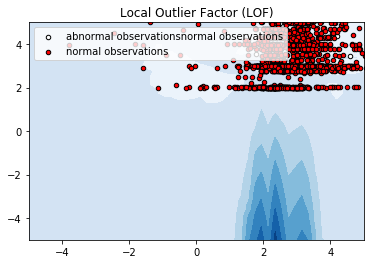

In [28]:
# plot the level sets of the decision function
X_lof_=X_lof[:10000,[1,28]]
X_lof_=np.array(X_lof_)

clf3 = LocalOutlierFactor(n_neighbors=20)
y_pred_lof = clf3.fit_predict(X_lof_)
y_pred_outliers_lof = y_pred_lof[200:]

xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf3._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X_lof_[:200, 0], X_lof_[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X_lof_[200:, 0], X_lof_[200:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["abnormal observationsnormal observations",
            "normal observations"],
           loc="upper left")
plt.show()

In [29]:
print("Accuracy:",(len(X_lof)-n_errors)/len(X_lof))

Accuracy: 0.8998545127406777
